In [13]:
from __future__ import unicode_literals
import youtube_dl
from bs4 import BeautifulSoup as bs
import requests
import random
import os
import wave
import pylab
from pydub import AudioSegment

In [14]:

def video_getter(string):

    base = "https://www.youtube.com/results?search_query="
    qstring = str(string)
    r = requests.get(base+qstring)
    page = r.text
    soup=bs(page,'html.parser')

    vids = soup.findAll('a',attrs={'class':'yt-uix-tile-link'})
    z = len(vids)
    videolist=[]
    for v in vids:
        tmp = 'https://www.youtube.com' + v['href']
        videolist.append(tmp)

    x = random.randint(0,z+1)

    return(videolist[x])


def graph_spectrogram(wav_file):
    sound_info, frame_rate = get_wav_info(wav_file)
    pylab.figure(num=None, figsize=(19, 12))
    pylab.subplot(111)
    pylab.title('spectrogram of %r' % wav_file)
    pylab.specgram(sound_info, Fs=frame_rate)
    pylab.savefig('spectrogram.png')
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.fromstring(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

In [5]:
noise = video_getter('dog barking') #Insert any search you want here to pick a NOISE file from YouTube
audio = video_getter('guitar pluck') #Inert any search you want here to pick an AUDIO file from YouTube

In [21]:
ydl_opts = {
    'format': 'bestaudio/best',
    'outtmpl': '%(id)s.%(ext)s',
    
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'mp3',
        'preferredquality': '192',
    }],
}

with youtube_dl.YoutubeDL(ydl_opts) as ydl:
    ydl.download([str(noise)])
    info = ydl.extract_info(str(noise))
     
    eyeda = info['id'],
    print(str(eyedn[0]) +'.mp3')
    
soundn = AudioSegment.from_mp3(str(eyedn[0]) +'.mp3')
soundn.export(str(eyedn[0]) + '.wav', format="wav")
soundn = AudioSegment.from_wav(str(eyedn[0]) + '.wav')
soundn = soundn[1000:3000]
soundn.export(str(eyedn[0]) + '.wav', format="wav")
    

with youtube_dl.YoutubeDL(ydl_opts) as ydl:
    ydl.download([str(audio)])
    info = ydl.extract_info(str(audio))
     
    eyedn = info['id'],
    print(str(eyeda[0]) +'.mp3')

sounda = AudioSegment.from_mp3(str(eyeda[0]) +'.mp3')
sounda.export(str(eyeda[0]) + '.wav', format="wav")
sounda = AudioSegment.from_wav(str(eyeda[0]) + '.wav')
sounda = sounda[1000:3000]
sounda.export(str(eyeda[0]) + '.wav', format="wav")
    

[youtube] BzM-K7agIpo: Downloading webpage
[youtube] BzM-K7agIpo: Downloading video info webpage
[download] Destination: BzM-K7agIpo.webm
[download] 100% of 1.73MiB in 00:02                  
[ffmpeg] Destination: BzM-K7agIpo.mp3
Deleting original file BzM-K7agIpo.webm (pass -k to keep)
[youtube] BzM-K7agIpo: Downloading webpage
[youtube] BzM-K7agIpo: Downloading video info webpage
[download] Destination: BzM-K7agIpo.webm
[download] 100% of 1.73MiB in 00:03                  
[ffmpeg] Destination: BzM-K7agIpo.mp3
Deleting original file BzM-K7agIpo.webm (pass -k to keep)
nYWzZ7BM8pA.mp3
[youtube] nYWzZ7BM8pA: Downloading webpage
[youtube] nYWzZ7BM8pA: Downloading video info webpage
[download] Destination: nYWzZ7BM8pA.webm
[download] 100% of 6.03MiB in 00:04                  
[ffmpeg] Destination: nYWzZ7BM8pA.mp3
Deleting original file nYWzZ7BM8pA.webm (pass -k to keep)
[youtube] nYWzZ7BM8pA: Downloading webpage
[youtube] nYWzZ7BM8pA: Downloading video info webpage
[download] Destination:

<_io.BufferedRandom name='BzM-K7agIpo.wav'>

C:\Users\jimmy\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


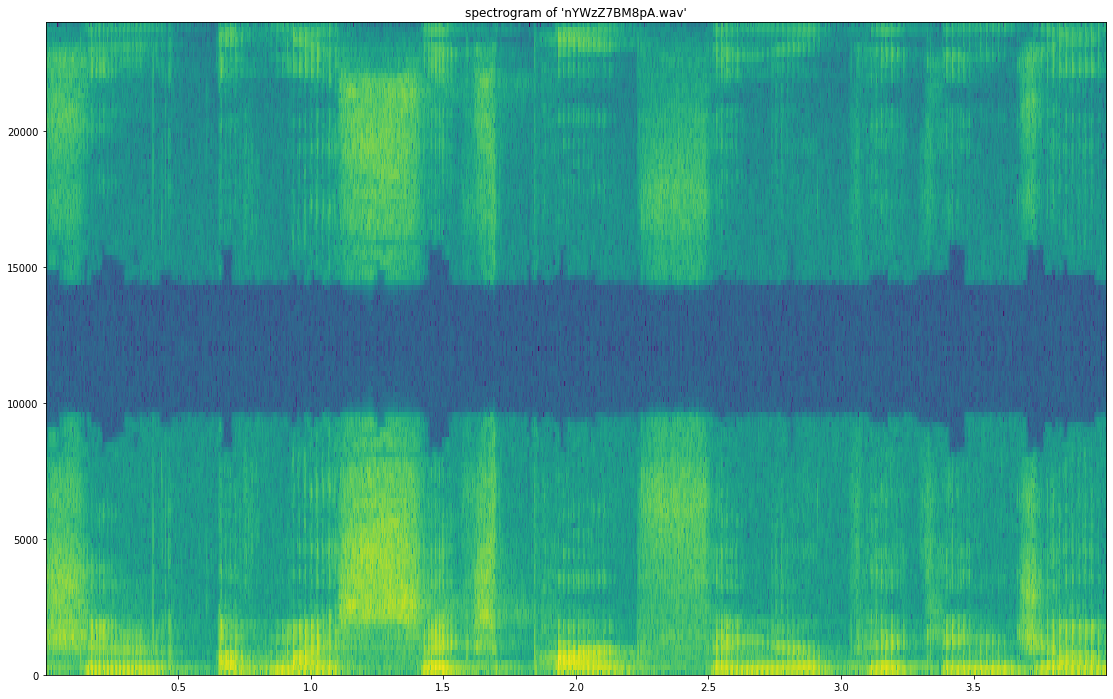

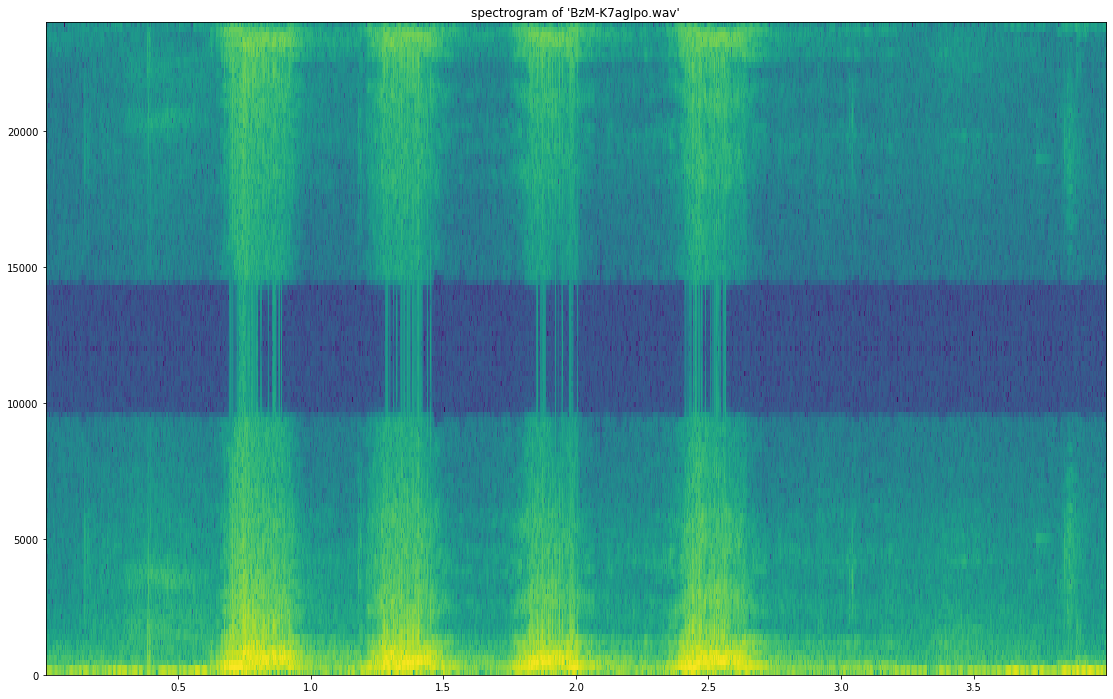

In [22]:
graph_spectrogram(str(eyedn[0]) + '.wav')
graph_spectrogram(str(eyeda[0]) + '.wav')

In [29]:
sound1 = AudioSegment.from_file(str(eyeda[0]) + '.wav')
sound2 = AudioSegment.from_file(str(eyedn[0]) + '.wav')

combined = sound1.overlay(sound2)

combined.export(str(eyedn[0]) + '+' + str(eyeda[0]) + '.wav', format='wav')


<_io.BufferedRandom name='nYWzZ7BM8pA+BzM-K7agIpo.wav'>

C:\Users\jimmy\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


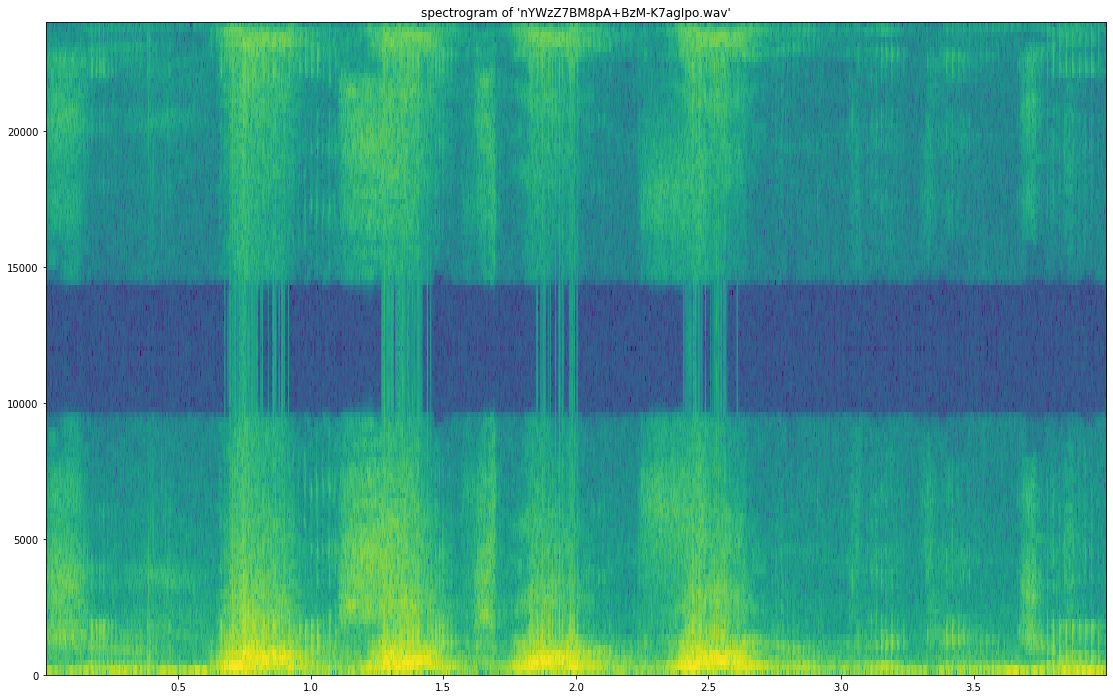

In [31]:
graph_spectrogram((str(eyedn[0]) + '+' + str(eyeda[0]) + '.wav'))